In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%env OPENAI_API_KEY=<Enter your key here>

from PIL import Image
from IPython.core.display import HTML

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.knowtag import PROMPT

env: OPENAI_API_KEY=<Enter your key here>


/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
interpreter = ProgramInterpreter(dataset='okDet')

Registering FACEDET step


/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Registering LIST step
Registering CLASSIFY step


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Registering RESULT step
Registering TAG step
Registering LOC step


In [3]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction,list_max=20)

generator = ProgramGenerator(prompter=create_prompt, debug=True)

/home/ziliottf/tmp/ipykernel_519586/3107967068.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image.thumbnail((640,640),Image.ANTIALIAS)


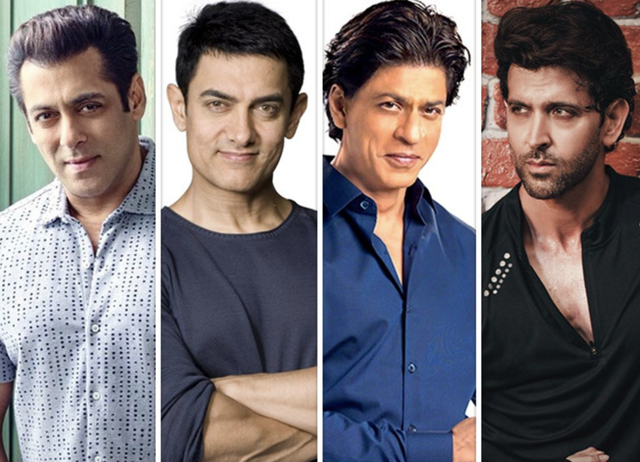

In [4]:
image = Image.open('../assets/bollywood.png')
image.thumbnail((640,640),Image.ANTIALIAS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [5]:
answer="""OBJ0=FACEDET(image=IMAGE)
LIST0=LIST(query='famous actors from Bollywood', max=4)
OBJ1=CLASSIFY(image=IMAGE, object=OBJ0, categories=LIST0)
IMAGE0=TAG(image=IMAGE, object=OBJ1)
FINAL_RESULT=RESULT(var=IMAGE0)
"""

In [6]:
instruction = "Tag these famous actors from Bollywood"
# instruction = "Tag the Khans of Bollywood"
# instruction = "Tag the protagonist of Bollywood movie Lagaan"
# instruction = "Tag the actors who have been part of the Bollywood franchise Dhoom"
prog,_ = generator.generate(instruction, answer)
print(prog)

OBJ0=FACEDET(image=IMAGE)
LIST0=LIST(query='famous actors from Bollywood', max=4)
OBJ1=CLASSIFY(image=IMAGE, object=OBJ0, categories=LIST0)
IMAGE0=TAG(image=IMAGE, object=OBJ1)
FINAL_RESULT=RESULT(var=IMAGE0)


In [7]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
print('Result:',result)

FACEDET
LIST
CLASSIFY
TAG
RESULT
Result: <PIL.Image.Image image mode=RGB size=640x462 at 0x7FC15A4500A0>



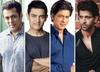
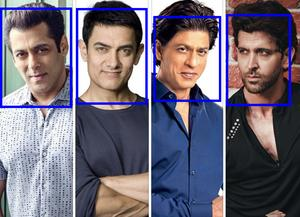
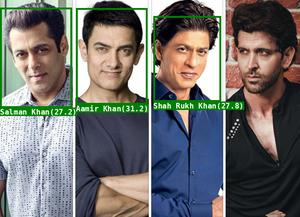
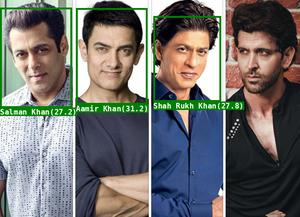

In [8]:
HTML(html_str)